Cho dữ liệu **asian_india_recipes.csv** chứa công thức (thành phần) nấu ăn của các món ăn một số nước châu Á như Hàn Quốc, Nhật Bản, Trung Quốc, Thái và Ấn Độ. 

Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và **chọn một thuật toán thích hợp** để thực hiện việc xác định một mẫu có **”cuisine”** là nước nào dựa trên các thông tin được cung cấp.   

1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đã đọc và chuẩn hóa, với tỷ lệ dữ liệu test là 0.3 

2. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?  

3. Đánh giá model dựa trên train/test. 

4. Trực quan hóa kết quả (nếu có). Đưa ra một số nhận xét dựa trên kết quả. 

5. Dựa trên kết quả, hãy cho biết nếu trong thành phần của món ăn có “cumin” và “fish” nhưng không có “yogurt” thì món ăn đó thường là món ăn của nước nào? 

6. Dựa trên kết quả, hãy cho biết nếu trong thành phần của món ăn có cumin nhưng không có “fish” và không có “soy_sauce” thì món ăn đó thường là món ăn của nước nào? 

7. In nội dung confusion matrix sau đó trả lời các câu hỏi sau :  
    a. Tỷ lệ % các công thức món ăn của Nhật Bản được dự đoán chính xác ?  
    b. Tỷ lệ % các công thức món ăn của Hàn Quốc bị gán sai nhãn thành Nhật Bản?  
    c. Nước nào có tỷ lệ % các công thức món ăn bị gán nhãn sai nhiều nhất ?

 **----------------------------------------------------  DATA OVERVIEW  ----------------------------------------------------------**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
data = pd.read_csv('du lieu cung cap/asian_indian_recipes.csv', index_col = 0)

In [3]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 2448
Number of columns: 384


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 65 to 57690
Columns: 384 entries, cuisine to zucchini
dtypes: int64(383), object(1)
memory usage: 7.2+ MB


In [5]:
data.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
descrip = data.describe(include='all').transpose()
pd.options.display.max_rows = 1000
display(descrip)
pd.options.display.max_rows = 15

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cuisine,2448,5,korean,799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
almond,2448,NaN,NaN,NaN,0.0183824,0.134357,0,0,0,0,1
angelica,2448,NaN,NaN,NaN,0,0,0,0,0,0,0
anise,2448,NaN,NaN,NaN,0.000408497,0.0202113,0,0,0,0,1
anise_seed,2448,NaN,NaN,NaN,0.00285948,0.0534085,0,0,0,0,1
apple,2448,NaN,NaN,NaN,0.0138889,0.117054,0,0,0,0,1
apple_brandy,2448,NaN,NaN,NaN,0,0,0,0,0,0,0
apricot,2448,NaN,NaN,NaN,0.00531046,0.072694,0,0,0,0,1
armagnac,2448,NaN,NaN,NaN,0,0,0,0,0,0,0
artemisia,2448,NaN,NaN,NaN,0.00245098,0.0494568,0,0,0,0,1


**1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đã đọc và chuẩn hóa, với tỷ lệ dữ liệu test là 0.3**

**1.1. Giữ nguyên bộ inputs và outputs**

In [7]:
inputs = data.iloc[:,1:]
inputs.shape

(2448, 383)

In [8]:
inputs.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
outputs = data[['cuisine']]
outputs['cuisine'].unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.30,random_state = 42) 

**1.2. Xử lý Inputs:** Có nhiều columns chỉ có giá trị 0 => remove

In [11]:
cols_lst = data.columns.to_list()
cols_lst.remove('cuisine')

In [12]:
from tqdm import tqdm_notebook as tqdm

cols_del = list()
for name, column in tqdm(data[cols_lst].iteritems(), total=len(cols_lst)):
    if (column.count() == 0) or (column.max() == column.min()):
        cols_del.append(name)
        cols_lst.remove(name)
        
if len(cols_del) > 0:
    print(len(cols_del), 'columns will not be further used as they have only 1 unique level.')
else:
    print('All predictors have more than 1 unique level.')

HBox(children=(IntProgress(value=0, max=383), HTML(value='')))


99 columns will not be further used as they have only 1 unique level.


In [13]:
inputs_non_zero = data[cols_lst]
inputs_non_zero.shape

(2448, 284)

In [14]:
inputs_non_zero.head()

,almond,anise,anise_seed,apple,apricot,artemisia,asparagus,avocado,bacon,banana,...,wheat,wheat_bread,white_bread,white_wine,whole_grain_wheat_flour,wine,yam,yeast,yogurt,zucchini
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**1.3. Xử lý Output:** Dành cho các model yêu cầu output là int

In [15]:
from sklearn.preprocessing import LabelEncoder
lb_cuisine = LabelEncoder()
cuisine_df = data[['cuisine']]
cuisine_df["cuisine_code"] = lb_cuisine.fit_transform(cuisine_df["cuisine"])

# check outputs coding
cuisine_df.drop_duplicates()

,cuisine,cuisine_code
65,indian,1
2333,thai,4
10734,chinese,0
11301,japanese,2
15025,korean,3


In [16]:
outputs_int = cuisine_df[['cuisine_code']]
outputs_int['cuisine_code'].unique()

array([1, 4, 0, 2, 3], dtype=int64)

**2. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?**

**3. Đánh giá model dựa trên train/test**

**4. Trực quan hóa kết quả (nếu có). Đưa ra một số nhận xét dựa trên kết quả**

Đây là bài toán Classification thuộc nhóm Supervised Learning. Output là multi-class và dữ liệu input nhiều chiều.  
Một số model có thể dùng cho dạng bài toán này:
    1. KNN - Classification
    2. Decision Tree
    3. Random Forest

 **---------------------------------------------------- 1. KNN CLASSISFICATION  ----------------------------------------------------------**

**Tìm best K**

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
list_k = []
list_acc = []
for K_value in range(1,int(y_train.shape[0]**0.5)):        
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100 
    list_acc.append(acc)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)
    

Accuracy is  69.25170068027211 % for K-Value: 1
Accuracy is  66.25850340136054 % for K-Value: 2
Accuracy is  71.156462585034 % for K-Value: 3
Accuracy is  70.06802721088435 % for K-Value: 4
Accuracy is  71.29251700680273 % for K-Value: 5
Accuracy is  69.38775510204081 % for K-Value: 6
Accuracy is  70.34013605442176 % for K-Value: 7
Accuracy is  69.79591836734694 % for K-Value: 8
Accuracy is  70.20408163265306 % for K-Value: 9
Accuracy is  70.61224489795919 % for K-Value: 10
Accuracy is  70.8843537414966 % for K-Value: 11
Accuracy is  71.42857142857143 % for K-Value: 12
Accuracy is  71.56462585034014 % for K-Value: 13
Accuracy is  71.97278911564626 % for K-Value: 14
Accuracy is  71.97278911564626 % for K-Value: 15
Accuracy is  71.83673469387755 % for K-Value: 16
Accuracy is  71.42857142857143 % for K-Value: 17
Accuracy is  70.8843537414966 % for K-Value: 18
Accuracy is  72.51700680272108 % for K-Value: 19
Accuracy is  71.56462585034014 % for K-Value: 20
Accuracy is  71.56462585034014 % 

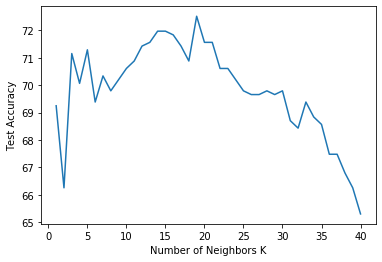

In [19]:
import matplotlib.pyplot as plt
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [20]:
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]
print("The optimal number of neighbors is", k,"with", list_acc[vi_tri])

The optimal number of neighbors is 19 with 72.51700680272108


In [21]:
# select k => ap dung model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [22]:
y_pred = knn.predict(X_test)

In [23]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ", 
      knn.score(X_train,y_train)*100,"%")
print("The Test prediction accuracy is: ", 
      knn.score(X_test,y_test)*100,"%")

The Train prediction accuracy is:  74.83946293053123 %
The Test prediction accuracy is:  72.51700680272108 %


**Đánh giá model => Dùng confuse matrix**

In [24]:
y_pred = knn.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test['cuisine'].to_list())[0].values, 
                   'Prediction': pd.DataFrame(y_pred)[0].values})  
df.head()

,Actual,Prediction
0,korean,korean
1,korean,korean
2,korean,korean
3,korean,korean
4,thai,thai


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[ 77,   7,   9,  52,   0],
       [  3, 164,   0,   9,   1],
       [  3,   7,  48,  30,   0],
       [  3,   7,   6, 213,   0],
       [ 11,  28,   3,  23,  31]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.79      0.53      0.64       145
      indian       0.77      0.93      0.84       177
    japanese       0.73      0.55      0.62        88
      korean       0.65      0.93      0.77       229
        thai       0.97      0.32      0.48        96

    accuracy                           0.73       735
   macro avg       0.78      0.65      0.67       735
weighted avg       0.76      0.73      0.70       735



**=> Quan sát kết quả và đánh giá: Mô hình có độ chính xác tầm 72%, không bị overfitting, class dự đoán tương đối**

**Try Feature Selection:** Thử chọn lọc fearture để xem có thể giảm độ nhiễu, tăng score cho Model được hay không?

In [28]:
#get correlations of each features in dataset
data_sub = inputs
corrmat = data_sub.corr()
top_corr_features = corrmat.index

In [29]:
data_sub.corr()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
almond,1.000000,NaN,-0.002766,-0.007328,-0.016241,NaN,-0.009999,NaN,-0.006783,NaN,...,NaN,-0.003913,0.001331,-0.008764,-0.024813,NaN,-0.005536,-0.017184,0.042957,-0.012729
angelica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anise,-0.002766,NaN,1.000000,-0.001083,-0.002399,NaN,-0.001477,NaN,-0.001002,NaN,...,NaN,-0.000578,-0.002949,-0.001295,-0.005452,NaN,-0.000818,-0.002538,-0.005072,-0.001880
anise_seed,-0.007328,NaN,-0.001083,1.000000,-0.006355,NaN,-0.003913,NaN,-0.002654,NaN,...,NaN,-0.001531,-0.007811,-0.003430,-0.014443,NaN,-0.002166,-0.006724,-0.013437,-0.004981
apple,-0.016241,NaN,-0.002399,-0.006355,1.000000,NaN,0.135408,NaN,-0.005883,NaN,...,NaN,-0.003394,0.031567,0.047124,-0.032009,NaN,-0.004801,-0.014902,0.014581,0.026810
apple_brandy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apricot,-0.009999,NaN,-0.001477,-0.003913,0.135408,NaN,1.000000,NaN,-0.003622,NaN,...,NaN,-0.002089,-0.010658,-0.004680,0.002648,NaN,-0.002956,0.036291,-0.018334,-0.006797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whole_grain_wheat_flour,-0.008764,NaN,-0.001295,-0.003430,0.047124,NaN,-0.004680,NaN,-0.003175,NaN,...,NaN,-0.001831,-0.009342,1.000000,-0.017273,NaN,-0.002591,-0.008042,0.065322,-0.005957
wine,-0.024813,NaN,-0.005452,-0.014443,-0.032009,NaN,0.002648,NaN,-0.013369,NaN,...,NaN,-0.007712,0.006162,-0.017273,1.000000,NaN,-0.010911,-0.033867,-0.067676,-0.025088


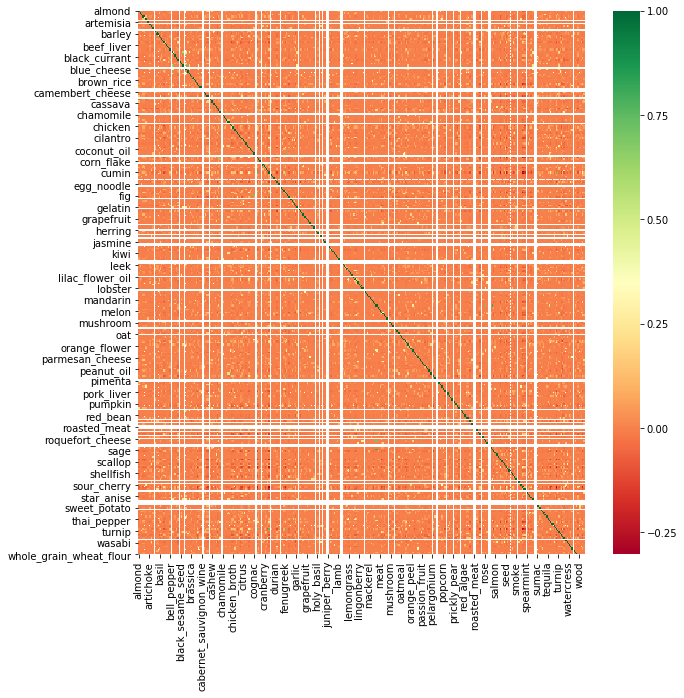

In [30]:
import seaborn as sns
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),cmap="RdYlGn") # annot=True: nếu muốn in cả giá trị

=> Quá nhiều inputs, không nhìn được sự tương quan giữa các biến

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [32]:
#apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(inputs,outputs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(inputs.columns)

In [33]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
pd.options.display.max_rows = 1000
display(featureScores.sort_values(by='Score',ascending=False))
pd.options.display.max_rows = 15

,Specs,Score
112,cumin,835.566663
359,turmeric,696.794092
102,coriander,623.552595
180,lemongrass,549.467849
95,coconut,445.807853
293,roasted_sesame_seed,438.111678
381,yogurt,416.588793
187,lime_juice,404.040015
88,cilantro,376.455635
126,fenugreek,376.020556


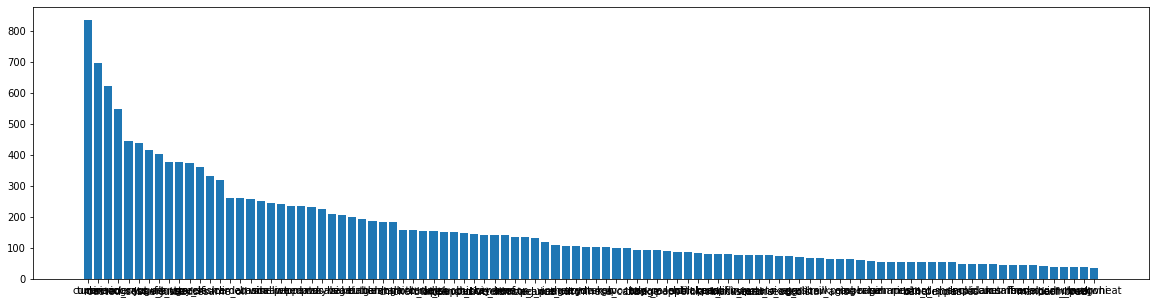

In [34]:
#visualization feature selection
nlargest = 100 # xem thử 100 biến có score lớn nhất

plt.figure(figsize = (20,5))
plt.bar(featureScores.nlargest(nlargest,'Score').Specs.values, featureScores.nlargest(nlargest,'Score').Score.values)
plt.show()

**1. Thử chọn những feature có score > 300 (còn 14 biến inputs)**  
    1.1. The Train prediction accuracy is:  64.91535318155283 %  
    1.2. The Test prediction accuracy is:  64.08163265306122 %  
    
**=> Độ chính xác của model bị giảm**

**2. Thử chọn những feature có score > 200 (còn 26 biến inputs)**   
2.1. The Train prediction accuracy is:  73.78867483946293 %  
2.2. The Test prediction accuracy is:  71.97278911564626 %

**=> Độ chính xác của model bị giảm, tốc độ xử lý nhanh hơn **

In [35]:
best_feature = featureScores[featureScores['Score'] > 200]['Specs'].values
best_feature

array(['basil', 'cardamom', 'cilantro', 'coconut', 'coriander', 'cumin',
       'fenugreek', 'fish', 'lemongrass', 'lime', 'lime_juice', 'pepper',
       'pork', 'roasted_sesame_seed', 'sake', 'scallion', 'seaweed',
       'sesame_oil', 'soy_sauce', 'soybean', 'starch', 'tomato',
       'turmeric', 'wasabi', 'wine', 'yogurt'], dtype=object)

In [36]:
inputs_best = data[best_feature]
inputs_best.head()

,basil,cardamom,cilantro,coconut,coriander,cumin,fenugreek,fish,lemongrass,lime,...,seaweed,sesame_oil,soy_sauce,soybean,starch,tomato,turmeric,wasabi,wine,yogurt
65,0,0,0,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
66,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
69,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
from sklearn.model_selection import train_test_split  
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(inputs_best, outputs, test_size=0.30) 

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
list_k = []
list_acc = []
for K_value in range(1,int(y_train_best.shape[0]**0.5)):        
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train_best, y_train_best) 
    y_pred_best = neigh.predict(X_test_best)
    acc = accuracy_score(y_test_best,y_pred_best)*100 
    list_acc.append(acc)
    print("Accuracy is ", accuracy_score(y_test_best,y_pred_best)*100,"% for K-Value:",K_value)
    

Accuracy is  68.43537414965986 % for K-Value: 1
Accuracy is  63.26530612244898 % for K-Value: 2
Accuracy is  68.84353741496598 % for K-Value: 3
Accuracy is  68.84353741496598 % for K-Value: 4
Accuracy is  68.9795918367347 % for K-Value: 5
Accuracy is  69.93197278911565 % for K-Value: 6
Accuracy is  71.70068027210884 % for K-Value: 7
Accuracy is  71.97278911564626 % for K-Value: 8
Accuracy is  71.0204081632653 % for K-Value: 9
Accuracy is  70.61224489795919 % for K-Value: 10
Accuracy is  71.29251700680273 % for K-Value: 11
Accuracy is  71.0204081632653 % for K-Value: 12
Accuracy is  70.47619047619048 % for K-Value: 13
Accuracy is  71.156462585034 % for K-Value: 14
Accuracy is  70.61224489795919 % for K-Value: 15
Accuracy is  70.47619047619048 % for K-Value: 16
Accuracy is  69.79591836734694 % for K-Value: 17
Accuracy is  69.93197278911565 % for K-Value: 18
Accuracy is  69.65986394557822 % for K-Value: 19
Accuracy is  68.9795918367347 % for K-Value: 20
Accuracy is  69.38775510204081 % fo

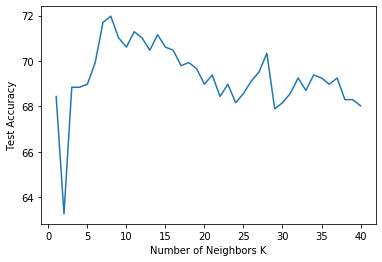

In [39]:
import matplotlib.pyplot as plt
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [40]:
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]
print("The optimal number of neighbors is", k,"with", list_acc[vi_tri])

The optimal number of neighbors is 8 with 71.97278911564626


In [41]:
# select k => ap dung model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_best, y_train_best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [42]:
y_pred_best = knn.predict(X_test_best)

In [43]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ", 
      knn.score(X_train_best,y_train_best)*100,"%")
print("The Test prediction accuracy is: ", 
      knn.score(X_test_best,y_test_best)*100,"%")

The Train prediction accuracy is:  73.78867483946293 %
The Test prediction accuracy is:  71.97278911564626 %


**Kết luận: Sau khi thử chọn lọc 26 feature (có score > 200) model có accuracy score không cao bằng**

 **------------------------------------------------------ End - KNN -------------------------------------------------------**

 **---------------------------------------------------- 2. DECISIONTREE CLASSIFIER  ----------------------------------------------------------**

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf = DecisionTreeClassifier(criterion='entropy') # nen dung Gini vi day la thuoc tinh lien tuc
tree_model = clf.fit(X_train, y_train)

In [46]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ", tree_model.score(X_train, y_train)*100,"%")
print("The Test prediction accuracy is: ", tree_model.score(X_test, y_test)*100,"%")

The Train prediction accuracy is:  99.70811441914769 %
The Test prediction accuracy is:  71.0204081632653 %


**=> Overfitting**

**Try Feature Selection:** Thử chọn 26 fearture (có score > 200) để xem có thể giảm độ nhiễu, tăng score cho Model được hay không?

In [47]:
best_feature = featureScores[featureScores['Score'] > 200]['Specs'].values
best_feature

array(['basil', 'cardamom', 'cilantro', 'coconut', 'coriander', 'cumin',
       'fenugreek', 'fish', 'lemongrass', 'lime', 'lime_juice', 'pepper',
       'pork', 'roasted_sesame_seed', 'sake', 'scallion', 'seaweed',
       'sesame_oil', 'soy_sauce', 'soybean', 'starch', 'tomato',
       'turmeric', 'wasabi', 'wine', 'yogurt'], dtype=object)

In [48]:
inputs_best = data[best_feature]
inputs_best.head()

,basil,cardamom,cilantro,coconut,coriander,cumin,fenugreek,fish,lemongrass,lime,...,seaweed,sesame_oil,soy_sauce,soybean,starch,tomato,turmeric,wasabi,wine,yogurt
65,0,0,0,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
66,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
69,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
clf = DecisionTreeClassifier(criterion='entropy') # nen dung Gini vi day la thuoc tinh lien tuc
tree_model = clf.fit(X_train_best, y_train_best)

In [50]:
# Kiểm tra độ chính xác
print("The Train prediction accuracy is: ", tree_model.score(X_train_best, y_train_best)*100,"%")
print("The Test prediction accuracy is: ", tree_model.score(X_test_best, y_test_best)*100,"%")

The Train prediction accuracy is:  82.37011091652072 %
The Test prediction accuracy is:  70.74829931972789 %


**=> Vẫn không giảm được overfitting**

 **------------------------------------------------------ End - Decision Tree -------------------------------------------------------**

 **---------------------------------------------------- 3. RANDOM FOREST  ----------------------------------------------------------**

**Chọn số lượng cây n_estimators phù hợp**

In [51]:
from sklearn.ensemble import RandomForestClassifier
list_n = []
list_acc = []
for n_estimators in [10, 30, 50, 70, 100, 120, 150, 170, 200, 250, 300]:        
    list_n.append(n_estimators)
    clf = RandomForestClassifier(n_estimators = n_estimators)
    forest_model = clf.fit(X_train, y_train)
    y_pred = forest_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100 
    list_acc.append(acc)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for n_estimators:",n_estimators)
    

Accuracy is  75.51020408163265 % for n_estimators: 10
Accuracy is  78.0952380952381 % for n_estimators: 30
Accuracy is  80.54421768707482 % for n_estimators: 50
Accuracy is  79.59183673469387 % for n_estimators: 70
Accuracy is  80.27210884353741 % for n_estimators: 100
Accuracy is  80.81632653061224 % for n_estimators: 120
Accuracy is  81.22448979591836 % for n_estimators: 150
Accuracy is  80.1360544217687 % for n_estimators: 170
Accuracy is  81.22448979591836 % for n_estimators: 200
Accuracy is  80.81632653061224 % for n_estimators: 250
Accuracy is  80.40816326530611 % for n_estimators: 300


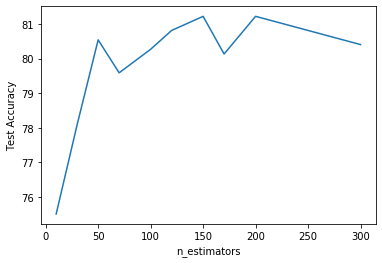

In [52]:
import matplotlib.pyplot as plt
plt.plot(list_n, list_acc)
plt.xlabel('n_estimators')
plt.ylabel('Test Accuracy')
plt.show()

In [53]:
vi_tri = list_acc.index(max(list_acc))
n = list_n[vi_tri]
print("The optimal n_estimators is", n,"with", list_acc[vi_tri])

The optimal n_estimators is 150 with 81.22448979591836


In [54]:
clf = RandomForestClassifier(n_estimators = n)
forest_model = clf.fit(X_train, y_train)

In [55]:
y_pred = forest_model.predict(X_test)

In [56]:
# Kiểm tra độ chính xác
print("The Training prediction accuracy is: ",
      forest_model.score(X_train,y_train)*100,"%")
print("The Testing prediction accuracy is: ",
      forest_model.score(X_test,y_test)*100,"%")

The Training prediction accuracy is:  99.70811441914769 %
The Testing prediction accuracy is:  81.22448979591836 %


**Đánh giá model => Dùng confuse matrix**

In [57]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test['cuisine'].to_list())[0].values, 
                   'Prediction': pd.DataFrame(y_pred)[0].values})  
df.head()

,Actual,Prediction
0,korean,korean
1,korean,korean
2,korean,korean
3,korean,korean
4,thai,thai


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[106,   6,   7,  22,   4],
       [  1, 169,   0,   2,   5],
       [ 10,   4,  50,  21,   3],
       [ 10,   4,   6, 209,   0],
       [ 12,  14,   0,   7,  63]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.76      0.73      0.75       145
      indian       0.86      0.95      0.90       177
    japanese       0.79      0.57      0.66        88
      korean       0.80      0.91      0.85       229
        thai       0.84      0.66      0.74        96

    accuracy                           0.81       735
   macro avg       0.81      0.76      0.78       735
weighted avg       0.81      0.81      0.81       735



**Nhận xét: Quan sát kết quả và đánh giá: Mô hình với n_estimators = 170 có độ chính xác cho Train là 99% Test là 81%, class dự đoán tương đối chính xác.**

**Try Feature Selection:** Thử chọn 26 fearture (có score > 200) để xem có thể giảm độ nhiễu, tăng score cho Model được hay không?

In [60]:
best_feature = featureScores[featureScores['Score'] > 200]['Specs'].values
best_feature

array(['basil', 'cardamom', 'cilantro', 'coconut', 'coriander', 'cumin',
       'fenugreek', 'fish', 'lemongrass', 'lime', 'lime_juice', 'pepper',
       'pork', 'roasted_sesame_seed', 'sake', 'scallion', 'seaweed',
       'sesame_oil', 'soy_sauce', 'soybean', 'starch', 'tomato',
       'turmeric', 'wasabi', 'wine', 'yogurt'], dtype=object)

In [61]:
inputs_best = data[best_feature]
inputs_best.head()

,basil,cardamom,cilantro,coconut,coriander,cumin,fenugreek,fish,lemongrass,lime,...,seaweed,sesame_oil,soy_sauce,soybean,starch,tomato,turmeric,wasabi,wine,yogurt
65,0,0,0,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
66,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
69,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
from sklearn.ensemble import RandomForestClassifier
list_n = []
list_acc = []
for n_estimators in [10, 30, 50, 70, 100, 120, 150, 170, 200, 250, 300]:        
    list_n.append(n_estimators)
    clf = RandomForestClassifier(n_estimators = n_estimators)
    forest_model = clf.fit(X_train_best, y_train_best)
    y_pred_best = forest_model.predict(X_test_best)
    acc = accuracy_score(y_test_best,y_pred_best)*100 
    list_acc.append(acc)
    print("Accuracy is ", accuracy_score(y_test_best,y_pred_best)*100,"% for n_estimators:",n_estimators)
    

Accuracy is  72.10884353741497 % for n_estimators: 10
Accuracy is  73.33333333333333 % for n_estimators: 30
Accuracy is  73.06122448979592 % for n_estimators: 50
Accuracy is  72.6530612244898 % for n_estimators: 70
Accuracy is  73.87755102040816 % for n_estimators: 100
Accuracy is  73.33333333333333 % for n_estimators: 120
Accuracy is  74.28571428571429 % for n_estimators: 150
Accuracy is  74.01360544217687 % for n_estimators: 170
Accuracy is  73.33333333333333 % for n_estimators: 200
Accuracy is  73.06122448979592 % for n_estimators: 250
Accuracy is  73.87755102040816 % for n_estimators: 300


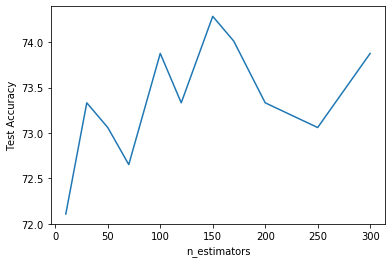

In [63]:
import matplotlib.pyplot as plt
plt.plot(list_n, list_acc)
plt.xlabel('n_estimators')
plt.ylabel('Test Accuracy')
plt.show()

In [64]:
vi_tri = list_acc.index(max(list_acc))
n = list_n[vi_tri]
print("The optimal n_estimators is", n,"with", list_acc[vi_tri])

The optimal n_estimators is 150 with 74.28571428571429


In [65]:
clf = RandomForestClassifier(n_estimators = n)
forest_model = clf.fit(X_train_best, y_train_best)

In [66]:
y_pred_best = forest_model.predict(X_test_best)

In [67]:
# Kiểm tra độ chính xác
print("The Training prediction accuracy is: ",
      forest_model.score(X_train_best,y_train_best)*100,"%")
print("The Testing prediction accuracy is: ",
      forest_model.score(X_test_best,y_test_best)*100,"%")

The Training prediction accuracy is:  82.37011091652072 %
The Testing prediction accuracy is:  73.33333333333333 %


**=> Select Feature làm giảm score**

 **------------------------------------------------------ End - Random Forest -------------------------------------------------------**

**>>>>>>>>>>>> KẾT LUẬN: CHỌN RANDOM FOREST LÀ MÔ HÌNH PHÙ HỢP NHẤT (giữ nguyên toàn bộ inputs) <<<<<<<<<<<<**

**5. Dựa trên kết quả, hãy cho biết nếu trong thành phần của món ăn có “cumin” và “fish” nhưng không có “yogurt” thì món ăn đó thường là món ăn của nước nào? **

In [68]:
clf = RandomForestClassifier(n_estimators = 150)
forest_model = clf.fit(X_train, y_train)

In [69]:
X_new1 = pd.DataFrame(columns=inputs.columns.to_list())
X_new1 = X_new1.append(pd.DataFrame({'cumin': [1], 'fish': [1], 'yogurt': [0]}))
X_new1 = X_new1.fillna(0)
# X_new1
y_pred_new1 = forest_model.predict(X_new1)

In [70]:
y_pred_new1

array(['indian'], dtype=object)

**6. Dựa trên kết quả, hãy cho biết nếu trong thành phần của món ăn có cumin nhưng không có “fish” và không có “soy_sauce” thì món ăn đó thường là món ăn của nước nào? **

In [71]:
X_new2 = pd.DataFrame(columns=inputs.columns.to_list())
X_new2 = X_new2.append(pd.DataFrame({'cumin': [1], 'fish': [0], 'soy_sauce': [0]}))
X_new2 = X_new2.fillna(0)
# X_new2
y_pred_new2 = forest_model.predict(X_new2)

In [72]:
y_pred_new2

array(['indian'], dtype=object)

**7. In nội dung confusion matrix sau đó trả lời các câu hỏi sau :**  
    a. Tỷ lệ % các công thức món ăn của Nhật Bản được dự đoán chính xác ?  
    b. Tỷ lệ % các công thức món ăn của Hàn Quốc bị gán sai nhãn thành Nhật Bản?  
    c. Nước nào có tỷ lệ % các công thức món ăn bị gán nhãn sai nhiều nhất ?

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred, labels=["chinese", "indian", "japanese", "korean", "thai"])

array([[106,   6,   7,  22,   4],
       [  1, 169,   0,   2,   5],
       [ 10,   4,  50,  21,   3],
       [ 10,   4,   6, 209,   0],
       [ 12,  14,   0,   7,  63]], dtype=int64)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.76      0.73      0.75       145
      indian       0.86      0.95      0.90       177
    japanese       0.79      0.57      0.66        88
      korean       0.80      0.91      0.85       229
        thai       0.84      0.66      0.74        96

    accuracy                           0.81       735
   macro avg       0.81      0.76      0.78       735
weighted avg       0.81      0.81      0.81       735



**Nhận xét:**  
    a. Các công thức món ăn của Nhật Bản được dự đoán chính xác khoảng 79%  
    b. Các công thức món ăn của Hàn Quốc bị gán sai nhãn thành Nhật Bản khoảng 7% 
    c. Nước có tỷ lệ % các công thức món ăn bị gán nhãn sai nhiều nhất là Nhật Bản (precision thấp nhất)